<h1 align=center>Evaluating Models for Spam Filtering</h1>

## Description
In this notebook, we will look at the application of machine learning to the detection of spam emails.

The activity is based around the UCI spambase data set.The original source can be found [here](https://archive.ics.uci.edu/ml/datasets/spambase).

The data consists of the following input columns:

* **type word_freq_WORD**: 48 attributes which are the percentage of words in the e-mail that match WORD.

* **char_freq_CHAR**: 6 attributes which are the percentage of characters in the e-mail that match CHAR.

* **capital_run_length_average**: the average length of uninterrupted sequences of capital letters.

* **capital_run_length_longest**: the length of longest uninterrupted sequence of capital letters.

* **capital_run_length_total**: the total number of capital letters in the e-mail.

The target feature is: 

* **spam**: denotes whether the e-mail was considered spam (1) or not (0).

## Objective
Build a number of classification models and evaluate them.

## Import the libraries we need

In [1]:
# Core libraries
import pandas as pd

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Sklearn classification model evaluation functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

# Matplotlib for charting
import matplotlib.pyplot as plt

Define a useful function.

In [2]:
# Define a function to plot the ROC/AUC
def plotRocAuc(model, X, y):
    
    probabilities = model.predict_proba(X)
    probabilities = probabilities[:, 1]  # keep probabilities for first class only
        
    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y, probabilities)    
    auc = roc_auc_score(y, probabilities)
    
    # Plot the "dumb model" line
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # Plot the model line
    plt.plot(fpr, tpr, marker='.')
    plt.text(0.75, 0.25, "AUC: " + str(round(auc,2)))
    
    # show the plot
    plt.show()
    
    return auc

## Load and understand the data

In [3]:
dataset = pd.read_csv("./Datasets/spam.csv")
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# Size of data set
dataset.shape

(4601, 58)

In [5]:
# Check for nulls
nulls = dataset.isnull().mean()
if len(nulls[nulls!=0]) == 0 : print('No nulls found')
else : print(nulls[nulls!=0])

No nulls found


## Check if we have balanced classes

In [6]:
# Class distribution - to check if we have balanced classes
dataset.spam.value_counts()

0    2788
1    1813
Name: spam, dtype: int64

## Split into X and y

In [7]:
# Define the X (input) and y (target) features
X = dataset.drop("spam", axis=1)
y = dataset.spam

## Rescale

In [8]:
# Rescale the input features
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

## Train test split

In [9]:
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Build and check models

****************************************
LogisticRegression

Confusion Matrix :
[[1813   79]
 [ 472  718]]

Accuracy : 0.82122
	
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1892
           1       0.90      0.60      0.72      1190

    accuracy                           0.82      3082
   macro avg       0.85      0.78      0.80      3082
weighted avg       0.83      0.82      0.81      3082


ROC / AUC :


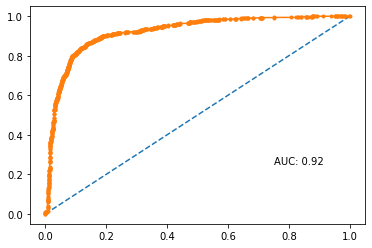

****************************************
DecisionTreeClassifier

Confusion Matrix :
[[1892    0]
 [   1 1189]]

Accuracy : 0.99968
	
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1892
           1       1.00      1.00      1.00      1190

    accuracy                           1.00      3082
   macro avg       1.00      1.00      1.00      3082
weighted avg       1.00      1.00      1.00      3082


ROC / AUC :


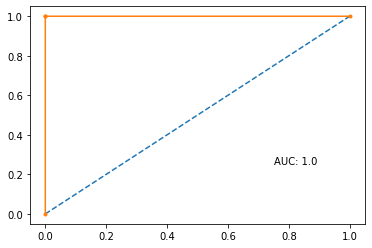

****************************************
GaussianNB

Confusion Matrix :
[[1396  496]
 [  56 1134]]

Accuracy : 0.82090
	
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.74      0.83      1892
           1       0.70      0.95      0.80      1190

    accuracy                           0.82      3082
   macro avg       0.83      0.85      0.82      3082
weighted avg       0.86      0.82      0.82      3082


ROC / AUC :


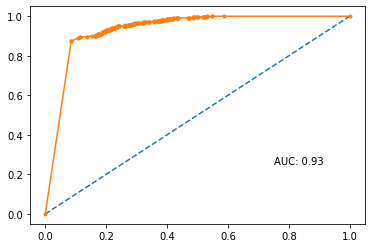

****************************************
KNeighborsClassifier

Confusion Matrix :
[[1892    0]
 [   1 1189]]

Accuracy : 0.99968
	
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1892
           1       1.00      1.00      1.00      1190

    accuracy                           1.00      3082
   macro avg       1.00      1.00      1.00      3082
weighted avg       1.00      1.00      1.00      3082


ROC / AUC :


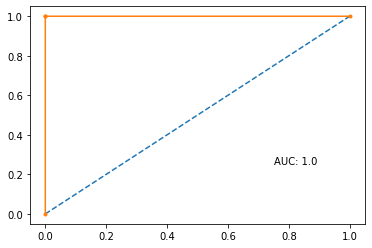

In [10]:
# Build and fit a few models

models = [LogisticRegression(C=0.1, solver='liblinear'),
          DecisionTreeClassifier(criterion='gini'),
         GaussianNB(),
         KNeighborsClassifier(n_neighbors=5, weights='distance')]

for model in models:
    print('**'*20)
    print(type(model).__name__)
    
    model.fit(X_train, y_train)
    
    # Predict the training data
    predictions = model.predict(X_train) 

    # Plot the confusion matrix
    print('\nConfusion Matrix :')
    print(confusion_matrix(y_train, predictions))

    # Accuracy score
    print('\nAccuracy : %.5f' % accuracy_score(y_train, predictions))

    # Classification report
    print('\t\nClassification Report :')
    print(classification_report(y_train, predictions))

    # ROC / AUC
    print('\nROC / AUC :')
    plotRocAuc(model, X_train, y_train)
    

## Evaluate models

****************************************
LogisticRegression

Confusion Matrix :
[[853  43]
 [271 352]]

Accuracy : 0.79329
	
Classification Report :
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       896
           1       0.89      0.57      0.69       623

    accuracy                           0.79      1519
   macro avg       0.83      0.76      0.77      1519
weighted avg       0.81      0.79      0.78      1519


ROC / AUC :


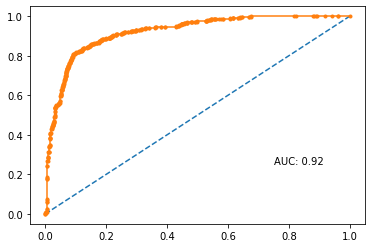

****************************************
DecisionTreeClassifier

Confusion Matrix :
[[831  65]
 [ 59 564]]

Accuracy : 0.91837
	
Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       896
           1       0.90      0.91      0.90       623

    accuracy                           0.92      1519
   macro avg       0.92      0.92      0.92      1519
weighted avg       0.92      0.92      0.92      1519


ROC / AUC :


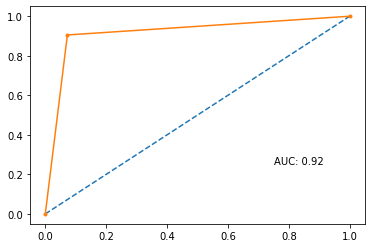

****************************************
GaussianNB

Confusion Matrix :
[[643 253]
 [ 23 600]]

Accuracy : 0.81830
	
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.72      0.82       896
           1       0.70      0.96      0.81       623

    accuracy                           0.82      1519
   macro avg       0.83      0.84      0.82      1519
weighted avg       0.86      0.82      0.82      1519


ROC / AUC :


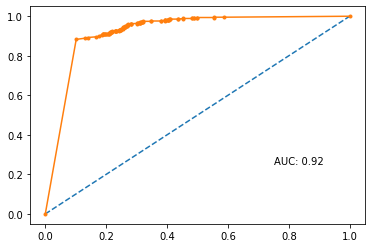

****************************************
KNeighborsClassifier

Confusion Matrix :
[[830  66]
 [ 82 541]]

Accuracy : 0.90257
	
Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       896
           1       0.89      0.87      0.88       623

    accuracy                           0.90      1519
   macro avg       0.90      0.90      0.90      1519
weighted avg       0.90      0.90      0.90      1519


ROC / AUC :


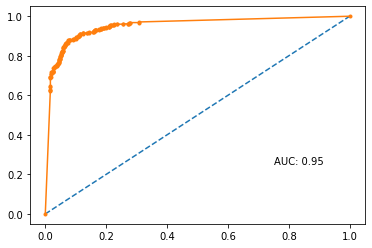

In [11]:
# Evaluate the models

for model in models:
    print('**'*20)
    print(type(model).__name__)
        
    # Predict the testing data
    predictions = model.predict(X_test) 

    # Plot the confusion matrix
    print('\nConfusion Matrix :')
    print(confusion_matrix(y_test, predictions))

    # Accuracy score
    print('\nAccuracy : %.5f' % accuracy_score(y_test, predictions))

    # Classification report
    print('\t\nClassification Report :')
    print(classification_report(y_test, predictions))

    # ROC / AUC
    print('\nROC / AUC :')
    plotRocAuc(model, X_test, y_test)
    

## Summary
Let's resume the above results for testing set and choose the best model :

In [12]:
results = [] # store the results

for model in models:
    model_results = {} # store the model's results
    
    # predict the testing data
    predictions = model.predict(X_test)
    # predict the probabilities for the class spam(1)
    probabilities = model.predict_proba(X_test)[:, 1]
    # compute the results
    # model name
    model_results['model'] = type(model).__name__
    # accuracy score
    model_results['accuracy'] = accuracy_score(y_test, predictions)
    # precision , recall and F1-score for class spam
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions)
    model_results['precision'] = precision[1]
    model_results['recall'] = recall[1]
    model_results['f1_score'] = f1_score[1]
    # AUC
    model_results['auc'] = roc_auc_score(y_test, probabilities)
    # append the results to the list
    results.append(model_results)
    
# show the results as a dataframe
results = pd.DataFrame(results)
results.set_index('model').style.format("{:.3}")

,accuracy,precision,recall,f1_score,auc
model,,,,,
LogisticRegression,0.793,0.891,0.565,0.692,0.921
DecisionTreeClassifier,0.918,0.897,0.905,0.901,0.916
GaussianNB,0.818,0.703,0.963,0.813,0.921
KNeighborsClassifier,0.903,0.891,0.868,0.88,0.951


After evaluation of the models using the test data, we found that :
* In terms of **Accuracy Score**, the **Decision Tree** is the best model (acc_score = 0.917). But this metric isn't reliable to mesure the performance of our models because the data consists of unbalanced target classes (spam : 1813 | not a spam : 2718). We should look to other measures.
* In general cases, we try to optimize the **F1-score** metric, but in our case, it ould be better if we optimize the **precision of class spam**, because this will minimize the number of genuine emails that will be filtered out as spam. With this strategy in mind, and taking in consideration the precision/recall tradeoff, **Decision Tree** and **K-Neighbors** classifiers are the best ones.
* The final metric is the **AUC** ; it gives us a numerical measure of the model separation ability. In this case, **K-Neighbors** does the best job (auc = 0.951).